<a href="https://colab.research.google.com/github/mozhgans/Error-analysis-of-concept-embedding-Approaches/blob/main/Bipartite_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[('sense1', 'example.org', {'weight': 1}), ('something', 'site.com', {'weight': 1}), ('sense2', 'example.org', {'weight': 1}), ('sense3', 'example.org', {'weight': 1}), ('else', 'website.com', {'weight': 1})]


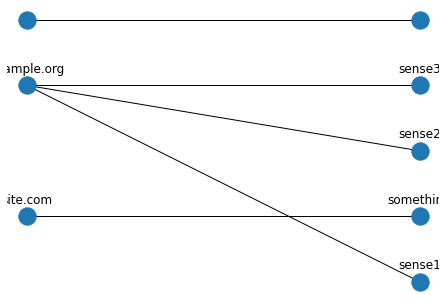

In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.DataFrame(
    {'IP': ['10.20.30.40',
      '30.50.70.90',
      '10.20.30.41',
      '10.20.30.42',
      '90.80.70.10'],
     'domain': ['example.org',
      'site.com',
      'example.org',
      'example.org',
      'website.com'],
     'subdomain': ['sense1', 'something', 'sense2', 'sense3', 'else']})

B = nx.Graph()
B.add_nodes_from(df['subdomain'], bipartite=0)
B.add_nodes_from(df['domain'], bipartite=1)
B.add_weighted_edges_from(
    [(row['domain'], row['subdomain'], 1) for idx, row in df.iterrows()], 
    weight='weight')
print(B.edges(data=True))
# [('sense1', 'example.org', {'weight': 1}), ('sense3', 'example.org', {'weight': 1}), ('sense2', 'example.org', {'weight': 1}), ('website.com', 'else', {'weight': 1}), ('site.com', 'something', {'weight': 1})]

pos = {node:[0, i] for i,node in enumerate(df['domain'])}
pos.update({node:[1, i] for i,node in enumerate(df['subdomain'])})
nx.draw(B, pos, with_labels=False)
for p in pos:  # raise text positions
    pos[p][1] += 0.25
nx.draw_networkx_labels(B, pos)

plt.show()